## Loading dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt
import random

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


## An overview of the images

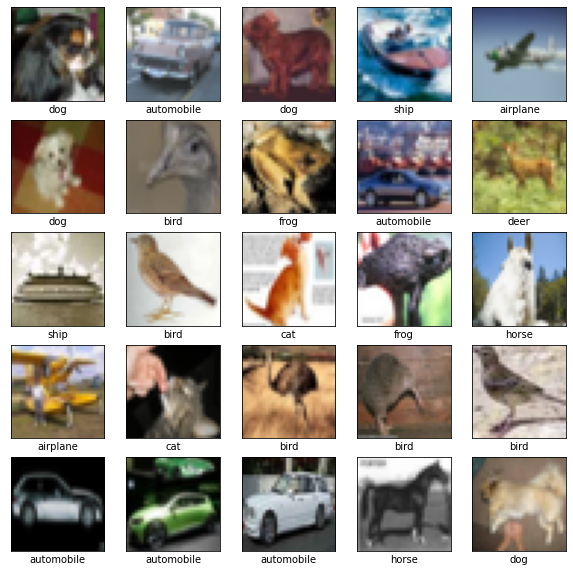

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

train_idx = list(range(len(train_labels)))

random.seed(1)
random_sample = random.sample(train_idx, 25)

plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_sample[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[random_sample[i]][0]])
plt.show()

## Color channels

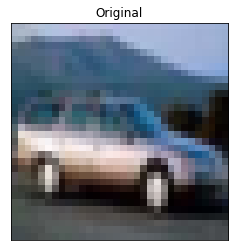

In [3]:
image_id = 4
plt.figure()
plt.imshow(train_images[image_id], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Original')
plt.show()

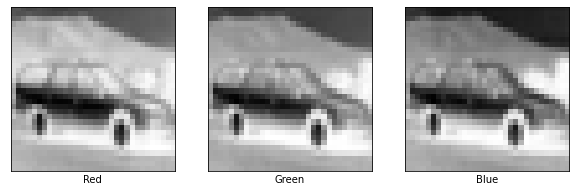

In [4]:
channel = ['Red', 'Green', 'Blue']
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[image_id][:,:, i], cmap=plt.cm.binary)
    plt.xlabel(channel[i])
plt.show()


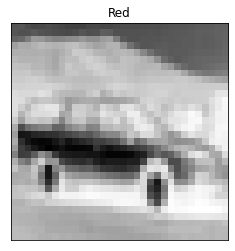

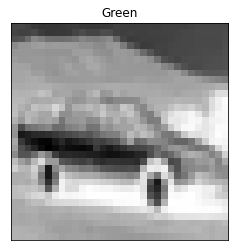

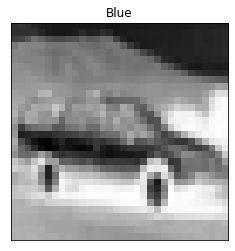

In [5]:
# Don't include - working out images
#Red
plt.figure()
plt.imshow(train_images[image_id][:,:, 0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Red')
plt.show()
#Green
plt.figure()
plt.imshow(train_images[image_id][:,:, 1], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Green')
plt.show()
#Blue
plt.figure()
plt.imshow(train_images[image_id][:,:, 2], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Blue')
plt.show()

##Build, compile and train the model

In [6]:
train_images.shape

(50000, 32, 32, 3)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

In [9]:
#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),                           
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(64, activation='relu'),                              
  tf.keras.layers.Dense(10),                             
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 6s 7ms/step - loss: 1.9008 - accuracy: 0.3193 - val_loss: 1.7687 - val_accuracy: 0.3626
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 1.7220 - accuracy: 0.3815 - val_loss: 1.7210 - val_accuracy: 0.3954
Epoch 3/10
704/704 [==============================] - 4s 6ms/step - loss: 1.6553 - accuracy: 0.4083 - val_loss: 1.6746 - val_accuracy: 0.3908
Epoch 4/10
704/704 [==============================] - 5s 7ms/step - loss: 1.6039 - accuracy: 0.4269 - val_loss: 1.6639 - val_accuracy: 0.4050
Epoch 5/10
704/704 [==============================] - 5s 7ms/step - loss: 1.5658 - accuracy: 0.4416 - val_loss: 1.5802 - val_accuracy: 0.4408
Epoch 6/10
704/704 [==============================] - 4s 5ms/step - loss: 1.5347 - accuracy: 0.4531 - val_loss: 1.5979 - val_accuracy: 0.4382
Epoch 7/10
704/704 [==============================] - 4s 6ms/step - loss: 1.5129 - accuracy: 0.4590 - val_loss: 1.5547 - val_accuracy: 0.4462
Epoch 

## Make predictions

truck


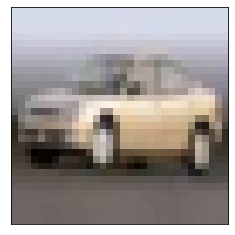

In [10]:
image_id = 7260 #Pick an image id between 5000 and 9999 inclusive

def get_prediction(image_id):
  img = test_images[image_id]
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  print(class_names[pred])
  plt.figure()
  plt.imshow(test_images[image_id], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.show()

get_prediction(image_id)

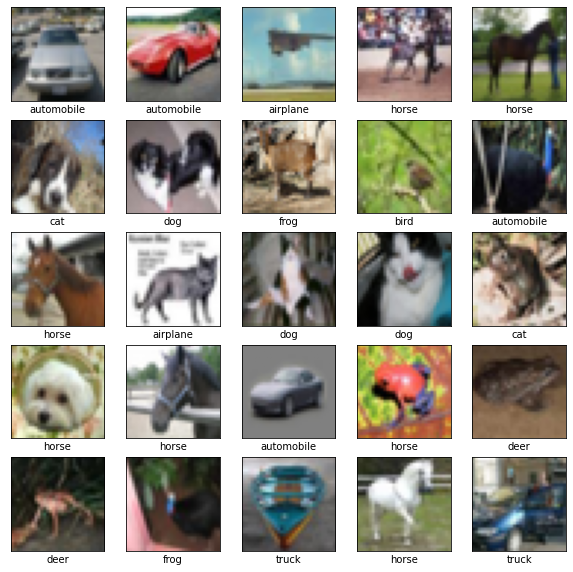

In [11]:
test_idx = list(range(5000,10000))

random.seed(1)
random_sample = random.sample(test_idx, 25)

def get_pred_id(image_id):
  img = test_images[image_id]
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  return pred

pred_labels = [get_pred_id(i) for i in random_sample]


plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_sample[i]], cmap=plt.cm.binary)
    #plt.xlabel(class_names[test_labels[random_sample[i]][0]])
    plt.xlabel(class_names[pred_labels[i]])

plt.show()

